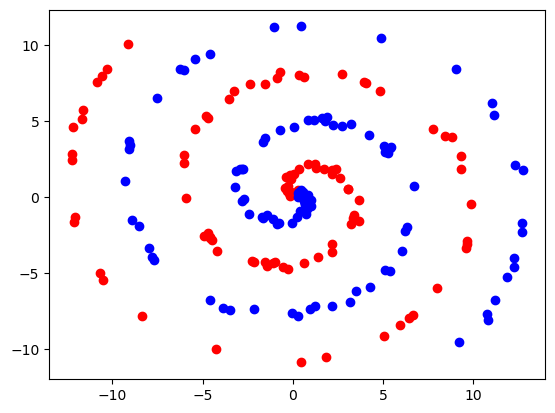

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from nn_from_scratch.nn import MLP

# DEMO: train binary classification model with a non-linear decision boundary
def generate_spiral_data(n_points, noise=0.5):
    n = np.random.rand(n_points, 1) * 780 * (2*np.pi) / 360
    x1 = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    y1 = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    x2 = np.cos(n) * n + np.random.rand(n_points, 1) * noise
    y2 = -np.sin(n) * n + np.random.rand(n_points, 1) * noise
    X = np.vstack((np.hstack((x1, y1)), np.hstack((x2, y2))))
    Y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, Y

# plotting data
X, Y = generate_spiral_data(100)
plt.figure()
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue')

In [61]:
# initalize model
model = MLP([2, 4, 4, 1])
num_iter = 50
learning_rate = 1e-3

# train
for k in range(num_iter):
    # forward pass
    ypred = [model(x) for x in X]
    loss = sum((y_a - y_p)**2 for y_a, y_p in zip(Y, ypred))
    # backprop
    for p in model.parameters():
        p.grad = 0 # zero-grad after each iteration
    loss.backprop()
    # update model
    for p in model.parameters():
        p.value += -learning_rate * p.grad
    
    # print training results
    if k % 10 == 0:
        print(f"Iter {k} | Loss: {loss.value}")


Iter 0 | Loss: 189.27714595273946
Iter 10 | Loss: 50.85376688924548
Iter 20 | Loss: 49.71912095614186
Iter 30 | Loss: 49.00442692163792
Iter 40 | Loss: 48.498667488564166


In [ ]:
# visualize model decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
Z = np.array([model(x) for x in X]).reshape(x_grid.shape)

# plt.figure()
# plt.scatter(x_grid, y_grid, marker='o', s=20)